# MANOVA 



In [1]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "moon",
        "transition": "zoom",
        "start_slideshow_at": "selected",
     "overlay": "<div class='myheader'><h2>my company</h2></div><div class='myfooter'><h2>the date</h2></div>"
     }
)

{'theme': 'moon',
 'transition': 'zoom',
 'start_slideshow_at': 'selected',
 'overlay': "<div class='myheader'><h2>my company</h2></div><div class='myfooter'><h2>the date</h2></div>"}

In [3]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=False)

In [12]:
hide_code_in_slideshow()
from IPython.display import Image
remote_image = Image(url='http://python.org/images/python-logo.gif')
display(remote_image)

In [2]:

from ipywidgets import interact
@interact(x=(0, 100))
def double_number(x):
    print("The double of %d is %d." % (x, x*2))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

## What is a MANOVA?

A MANOVA is an extension of an ANOVA however is concerned with a comparison of vectors of group means.

A MANOVA has one one or more factors (indepedent variable such as teaching method, BMI etc) with two or more levels (i.e groups) and two or more depent variables. 

The difference to ANOVAs is the number of depedent variables, as ANOVAs have one dependent variable while MANOVAs have two or more. 

## Technical details for MANOVA

A MANOVA is concerned with testing if vectors of means for two or more groups are sampled from the same sampling distribution (a t-test is concerned if two means are sampled from the same sampling distribution while an ANOVA is two or more means).

Unlike 

## When a MANOVA is used.

1. When several correlated variables and there is a need for an overall statistical test on this set of variables instead of performing multiple tests
2. To explore how independent variables influence some patten of response in the dependent variable.
3. Used when assumptions of sphericity (how equal the variance is, more equla variance == Sphericity)

In [4]:
import pandas as pd 
from statsmodels.multivariate.manova import MANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
df = pd.read_csv('MANOVA_example.csv')

In [6]:
print(df.head(5))
print(df.dtypes)

   Method   Test  Satisfaction
0       1  3.000         3.001
1       1  2.990         2.994
2       1  3.041         3.032
3       1  3.063         3.059
4       1  3.035         3.026
Method            int64
Test            float64
Satisfaction    float64
dtype: object


In [7]:
print(df['Method'].unique())

[1 2 3]


In [8]:
groups = df.groupby('Method')
groupa = groups.get_group(1)
groupb = groups.get_group(2)
groupc = groups.get_group(3)

In [9]:
hide_code_in_slideshow()
des = pd.concat([groupa[['Test','Satisfaction']].describe().T, groupb[['Test','Satisfaction']].describe().T, groupc[['Test','Satisfaction']].describe().T], 
                 keys=['Method 1', 'Method 2', 'Method 3'])
print(des)

                       count      mean       std    min      25%     50%  \
Method 1 Test           16.0  3.019313  0.018973  2.990  3.00675  3.0165   
         Satisfaction   16.0  3.015125  0.016661  2.994  3.00300  3.0105   
Method 2 Test           16.0  3.020438  0.015891  2.997  3.00975  3.0150   
         Satisfaction   16.0  3.013313  0.016600  2.993  3.00275  3.0065   
Method 3 Test           16.0  3.027813  0.010540  3.007  3.02250  3.0270   
         Satisfaction   16.0  3.013125  0.013266  2.985  3.00425  3.0135   

                           75%    max  
Method 1 Test          3.03275  3.063  
         Satisfaction  3.02525  3.059  
Method 2 Test          3.03375  3.050  
         Satisfaction  3.02400  3.045  
Method 3 Test          3.03225  3.048  
         Satisfaction  3.02050  3.036  


Looking at the following Graphs can conclude there 

<AxesSubplot:xlabel='Method', ylabel='Test'>

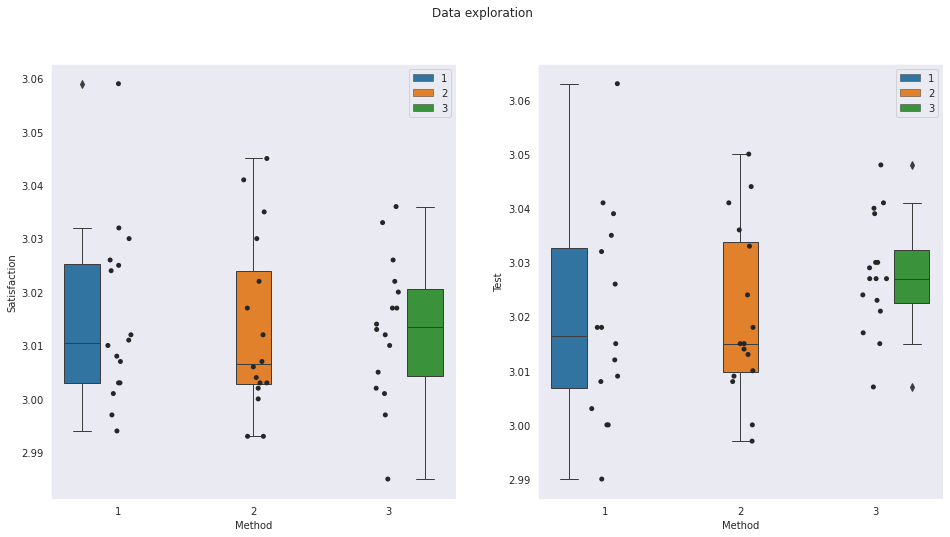

In [10]:
hide_code_in_slideshow()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle('Data exploration')

sns.boxplot(ax=ax[0], data=df, x='Method', y='Satisfaction', hue=df['Method'].tolist(), linewidth=1)
sns.stripplot(ax=ax[0], data=df, x='Method', y='Satisfaction', color=".15")


sns.boxplot(ax=ax[1], data=df, x='Method', y='Test', hue=df['Method'].tolist(), linewidth=1)
sns.stripplot(ax=ax[1], data=df, x='Method', y='Test', color=".15")

<AxesSubplot:xlabel='Satisfaction', ylabel='Test'>

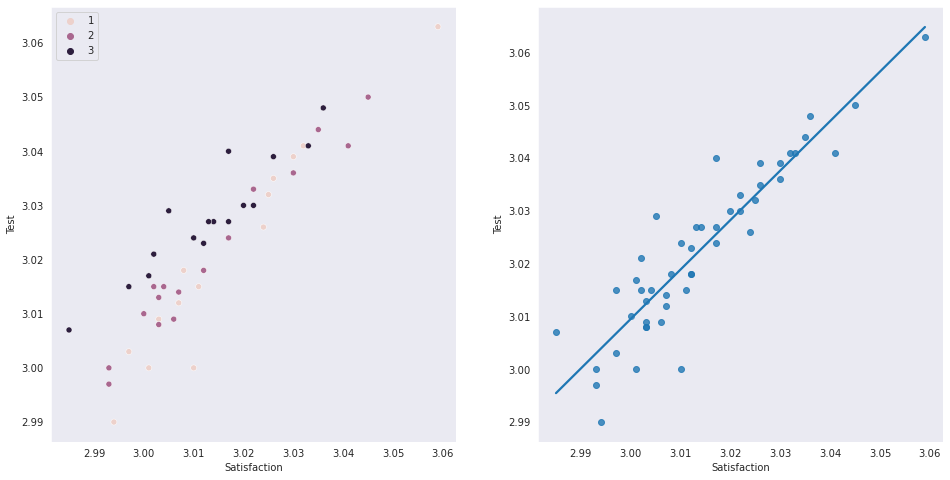

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.scatterplot(ax=ax[0], data=df, x='Satisfaction', y='Test', hue=df['Method'].tolist())
sns.regplot(ax=ax[1], data=df, x='Satisfaction', y='Test', ci=False)

In [12]:
fit = MANOVA.from_formula('Test + Satisfaction ~ Method', data=df)
fitted_model = fit.mv_test()

In [13]:
print(fitted_model)

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda    0.0002 2.0000 45.0000 131226.2913 0.0000
         Pillai's trace    0.9998 2.0000 45.0000 131226.2913 0.0000
 Hotelling-Lawley trace 5832.2796 2.0000 45.0000 131226.2913 0.0000
    Roy's greatest root 5832.2796 2.0000 45.0000 131226.2913 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
            Method          Value   Num DF   Den DF  F Value  Pr > F
--------------------------------------------------------------------
             Wilks' lambda  0.5423  2.0000  45.0000  18.9867  0.00

In [14]:
print('ANOVA TABLE for Test and Teaching method\n', sm.stats.anova_lm(ols('Method ~ Test', data=df).fit(), typ=1))
print('\nANOVA TABLE for Satisfaction and Teaching method\n', sm.stats.anova_lm(ols('Method ~ Satisfaction', data=df).fit(), typ=1))


ANOVA TABLE for Test and Teaching method
             df     sum_sq   mean_sq        F    PR(>F)
Test       1.0   1.603332  1.603332  2.42636  0.126164
Residual  46.0  30.396668  0.660797      NaN       NaN

ANOVA TABLE for Satisfaction and Teaching method
                 df     sum_sq   mean_sq         F   PR(>F)
Satisfaction   1.0   0.093295  0.093295  0.134503  0.71549
Residual      46.0  31.906705  0.693624       NaN      NaN


In [15]:
x = df[['Test', 'Satisfaction']]
y = df['Method']
post_hoc = lda().fit(X=x, y=y)

In [16]:
print(post_hoc.priors_,'\n')
print(post_hoc.scalings_,'\n')
print(post_hoc.means_,'\n')
print(post_hoc.explained_variance_ratio_)

[0.33333333 0.33333333 0.33333333] 

[[-215.04596693  -10.13601837]
 [ 207.44096018  -54.43799805]] 

[[3.0193125 3.015125 ]
 [3.0204375 3.0133125]
 [3.0278125 3.013125 ]] 

[0.99847505 0.00152495]


<AxesSubplot:xlabel='lda1', ylabel='lda2'>

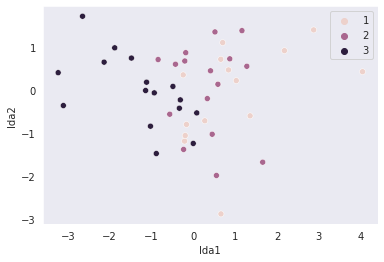

In [17]:
plotting_x = pd.DataFrame(lda().fit(X=x, y=y).transform(x), columns=['lda1', 'lda2']) 
plotting_x['Method'] = df['Method']
sns.scatterplot(data=plotting_x, x='lda1', y='lda2', hue=df['Method'].tolist())